<a href="http://esprit.tn"><img src = "https://upload.wikimedia.org/wikipedia/commons/f/ff/Logo_ESPRIT_Ariana.jpg" width = 300, align = "center"></a>



<h1 align=center><font size = 5>Lab 7.1: KDD-99 - EDA - E.T.L </font></h1>

Estimated duration: 30 min

The goal of this lab is to update the KDD benchmark by adding the following features:

- Update the class column by removing the dot at the end of each class label
- Add a new column for binary classification by keeping only two values: normal and attack
- Add a column that is able to provide classification according to the type of the attack (i.e 'probing', 'dos', 'u2r', 'r2l') , in addtion to ordinary trafic connection having 'normal' tag.


## A- Loading python modules

In [3]:
import datetime
import csv
import pandas as pnd


import matplotlib as plt
from matplotlib import pyplot as plt2
import numpy as np 

**(1)- **  Explain in one sentence the usefulness of each module.

In [4]:
datatime : gets time information for benchmarking
csv : manipulate csv files
pandas : use the dataframe
matplotlib : for plotting
numpy : for algebric and matricial functions

SyntaxError: invalid syntax (<ipython-input-4-7fb25bcbb13b>, line 1)

From matplotlib import pyplot as plt2: 

we import pyplot package from Matplotlib module.
**Pyplot** is the scripting component of **Matplotlib**.

#### Loading data 

**(2)-** Provide the data set file generated with columns:

In [5]:
path = './kddcup.data_10_percent_corrected'
path_meta= './kddcup.names'
# path of the data set generated with header column names
path_new='./new_dataset.csv'
path_4_classes= './training_attack_types'

In [6]:
t=datetime.datetime.now()
print(datetime.datetime.now()- t)

def init_chrono():
    return datetime.datetime.now()

def elapsed_time(t):
    if t:
        delta = init_chrono() - t
        print ('Elapsed time', delta)
        return delta 
    
# test
t = init_chrono()
elapsed_time(t)

0:00:00.000063
Elapsed time 0:00:00.000070


datetime.timedelta(microseconds=70)

**(3)- ** Load the KDD dataset using Pandas module 

In [7]:
def read_csv(path):
    return pnd.read_csv(path)

In [9]:


t = init_chrono()

# insert your code here
dataset = read_csv(path_new)
elapsed_time(t)

   Unnamed: 0  duration protocol_type service flag  src_bytes  dst_bytes  \
0           0         0           tcp    http   SF        181       5450   
1           1         0           tcp    http   SF        239        486   
2           2         0           tcp    http   SF        235       1337   
3           3         0           tcp    http   SF        219       1337   
4           4         0           tcp    http   SF        217       2032   
5           5         0           tcp    http   SF        217       2032   
6           6         0           tcp    http   SF        212       1940   
7           7         0           tcp    http   SF        159       4087   
8           8         0           tcp    http   SF        210        151   
9           9         0           tcp    http   SF        212        786   

   land  wrong_fragment  urgent   ...     dst_host_srv_count  \
0     0               0       0   ...                      9   
1     0               0       0   .

datetime.timedelta(seconds=2, microseconds=389325)

**(4)- **

The file './training_attack_types' provides for each attack it's type (i.e. dos, probing) one by row.
The file is provided with lab notebook. Place it in the same folder as the notebook.

    -(a)- Load the file 
    -(b)- Build from the loaded data a dict **Dict** in the form of <attack, type> (i.e. {'smurf':'dos'})


In [64]:
t = init_chrono()
# insert your code here (a) and (b)
f_attacks = open(path_4_classes, 'r')
attack_dict = dict(map(lambda x: x[:-1].split(' '),list(filter(lambda x: x != '\n', f_attacks.readlines()))))
elapsed_time(t)


Elapsed time 0:00:00.001622


datetime.timedelta(microseconds=1622)

In [65]:
print(attack_dict)

{'back': 'dos', 'buffer_overflow': 'u2r', 'ftp_write': 'r2l', 'guess_passwd': 'r2l', 'imap': 'r2l', 'ipsweep': 'probe', 'land': 'dos', 'loadmodule': 'u2r', 'multihop': 'r2l', 'neptune': 'dos', 'nmap': 'probe', 'perl': 'u2r', 'phf': 'r2l', 'pod': 'dos', 'portsweep': 'probe', 'rootkit': 'u2r', 'satan': 'probe', 'smurf': 'dos', 'spy': 'r2l', 'teardrop': 'dos', 'warezclient': 'r2l', 'warezmaster': 'r2l'}


**(5)**- Build a fuction get_attack_family(attack) witch returns the family of a given attack.
Example of returned values:

  - att_family = get_attack_family('back')       #att_family= 'dos'
  - att_family = get_attack_family('buffer_overflow')     #att_family= 'u2r'
    

In [66]:
# insert your code here
print(attack_dict)
def attack_family(attack):
    return 'normal' if attack == 'normal' else attack_dict[attack] if attack in attack_dict.keys() else None

print(attack_family('noraml'))
print(attack_family('back'))

{'back': 'dos', 'buffer_overflow': 'u2r', 'ftp_write': 'r2l', 'guess_passwd': 'r2l', 'imap': 'r2l', 'ipsweep': 'probe', 'land': 'dos', 'loadmodule': 'u2r', 'multihop': 'r2l', 'neptune': 'dos', 'nmap': 'probe', 'perl': 'u2r', 'phf': 'r2l', 'pod': 'dos', 'portsweep': 'probe', 'rootkit': 'u2r', 'satan': 'probe', 'smurf': 'dos', 'spy': 'r2l', 'teardrop': 'dos', 'warezclient': 'r2l', 'warezmaster': 'r2l'}
None
dos


## B- Formatting class labels: 

Each value of the class column ends with a dot (i.e. 'normal.','imap.').
During this section we will learn how to add a new and calculated columns to add to the dataset.

**1- ** Run the following code to learn how to add a column (duration_H) to a dataframe

In [67]:
dataset2 = dataset
dataset2['duration_H'] = dataset2['duration']

In [68]:
sample= dataset2[['duration_H', 'duration']]
sample= sample[sample['duration']>100]
sample.head(10)

,duration_H,duration
539,102,102
744,184,184
745,305,305
751,257,257
1577,216,216
3423,202,202
4026,12454,12454
4890,216,216
6748,289,289
7607,10774,10774


The following code will compute connection duration in hours and assign the result to the ***Duration_H*** column

In [69]:
dataset2['duration_H'] = dataset2['duration'].map(lambda x: x/3600)

In [70]:
sample= dataset2[['duration_H', 'duration']]
sample= sample[sample['duration']>1000]
sample.head(10)

,duration_H,duration
4026,3.459444,12454
7607,2.992778,10774
22951,0.284167,1023
26559,1.690833,6087
26607,3.713333,13368
27233,0.841389,3029
27237,0.582222,2096
27293,0.841667,3030
27298,0.841667,3030
27303,0.841667,3030


**2-** Using lambda functions build a new column that removes the dot from the dot of the class labels.
the result should be assigned to a new column named 'class2'

In [71]:
dataset2['class_no_dot'] = dataset2['class'].map(lambda x: x[:-1])
print(dataset2['class_no_dot'])

0         normal
1         normal
2         normal
3         normal
4         normal
5         normal
6         normal
7         normal
8         normal
9         normal
10        normal
11        normal
12        normal
13        normal
14        normal
15        normal
16        normal
17        normal
18        normal
19        normal
20        normal
21        normal
22        normal
23        normal
24        normal
25        normal
26        normal
27        normal
28        normal
29        normal
           ...  
493991    normal
493992    normal
493993    normal
493994    normal
493995    normal
493996    normal
493997    normal
493998    normal
493999    normal
494000    normal
494001    normal
494002    normal
494003    normal
494004    normal
494005    normal
494006    normal
494007    normal
494008    normal
494009    normal
494010    normal
494011    normal
494012    normal
494013    normal
494014    normal
494015    normal
494016    normal
494017    normal
494018    norm

## C- Building the column five_classes: 

**1- ** With the above defined function **get_attack_family** use the dataframe map() function to generate a column that provides the attack type of each record. 

In [72]:
t= init_chrono()

# insert your code here
dataset2['attack'] = dataset2['class_no_dot'].map(attack_family)

elapsed_time(t)

Elapsed time 0:00:00.208912


datetime.timedelta(microseconds=208912)

** 2-** print the unique values of the newly generated column

In [73]:
# insert your code here
attacks = list(dataset2['attack'].unique())
print(attacks)

['normal', 'u2r', 'dos', 'r2l', 'probe']


**3- **Compute the frequency of each element:

In [74]:
# insert your code here
dataset2['class_no_dot'].value_counts()

smurf              280790
neptune            107201
normal              97278
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: class_no_dot, dtype: int64

## D- Building a column for binary classification : 

Binary classification is the task of classifying the elements
of a given set into two groups (predicting which group each one belongs to)
on the basis of a classification rule or algorithm.
In this section we will generate a column for binary classification. 
The 'bin_class' column will receive one of the two following values: 

    -'Normal'
    -'Attack'

**1-** Generate the bin_class column 

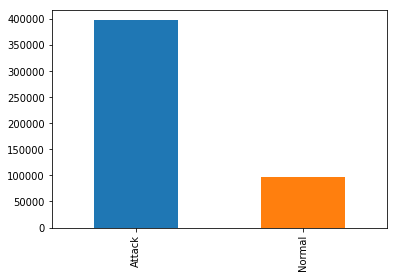

In [75]:
# insert your code here
dataset2['bin_class'] = dataset2['class_no_dot'].map(lambda x: 'Normal' if x == 'normal' else None if x == None else 'Attack')
dataset2[dataset2['bin_class'] == 'Attack']
dataset2['bin_class'].value_counts().plot(kind='bar')

**3- **Compute the frequency column values:

In [76]:
# insert your code here
dataset2['bin_class'].value_counts()

Attack    396743
Normal     97278
Name: bin_class, dtype: int64

**4- ** Print a preview the newly generated column with initial class column

In [77]:
# insert your code here
dataset2[['class', 'bin_class']]

,class,bin_class
0,normal.,Normal
1,normal.,Normal
2,normal.,Normal
3,normal.,Normal
4,normal.,Normal
5,normal.,Normal
6,normal.,Normal
7,normal.,Normal
8,normal.,Normal
9,normal.,Normal


**5- ** Save the generated dataframe to kdd_v2.csv: 

In [78]:
# insert your code here
dataset2.to_csv('kdd_v2.csv')